# The Cournot Model

In [1]:
# Importing useful packages e
import numpy as np
import scipy as sp
import sympy as sm
import matplotlib.pyplot as plt
import ipywidgets as widgets
import pylab

from numpy import array
from scipy import linalg
from scipy import optimize



# Sympy package helps writting  

sm.init_printing(use_unicode=True)

from sympy import *

# The Cournot model

## The setting og the model:

We examine a market with $N$ firms, whom produce the same homogenous good. Furthermore we assume that the aggregate demand of the good x is linearly given by:
$$p(x)=c-x$$
Every firm $i$ has a costfunction given by:
$$C(x_i)=k*x_i^2$$ where the aggregate guantity is given as $x=\sum_{j=0}^N(x_j)$

we then have that firm $i$ wish to maximize his profitfunction given by:
$$\underset{x_i}{max}: p(\sum_{j=0}^Nx_j)x_i)-C(x_i) =p(x)x_i-C(x_i)$$

So we have that firm $i$ is going to choose how much to produce given what the other firms in the market produces. It is intuitively that for $N\rightarrow \infty$ this modelsetup describes the setting of a perfect competition. Futhermore it is intuitive to imagine that for $N\rightarrow 1$ the setting describes a monopolistic competition situation.

We will know examine the more interessting case when there is only 2 firms  (A and B) competiting. We assume that firm a has a costfunction given by: $c_A=\frac{k}{2}*x_a^3$. The costfunction of firm b: $c_B=w+k*x_b^2$


In [2]:

# Defining the elements in the firms choice

c = sm.symbols('c')
qa, qb = sm.symbols('q_a q_b') 
k = sm.symbols('k')

In [13]:
# We start by defining the linear demand function:
def p_total(qa,qb,c):
    return (c-(qa+qb))

#Defining the cost function of firm A:
def c_A(qa,k):
    return (k/2*qa**2)

#Defining the cost function of firm B:
def c_B(qb,k):
    return (k*qb**2)

#The profitfunction of firm A:
def profit_A(qa,qb,c,k):
    return (p_total(qa,qb,c) * qa - c_A(qa,k))
    
#The profitfunction of firm B:
def profit_B(qa,qb,c,k):
    return (p_total(qa,qb,c) * qb - c_B(qb,k))

In [38]:
#We will now find the derivative, for which we will use to find the best response functions

foc_a = diff(profit_A(qa,qb,c,k),qa)
foc_b = diff(profit_B(qa,qb,c,k),qb)
display(foc_a,foc_b)


In [31]:
#We find the best responsefunctions by isolating respectively qa and qb
sola= sm.solve(sm.Eq(foc_a,0),qa)[0]
solb= sm.solve(sm.Eq(foc_b,0),qb)[0]
solb
print("\n Firm A's best response is given by: " + str(sola) + " and firm B's best response is given by:" + str(solb) )


 Firm A's best response is given by: (c - q_b)/(k + 2) and firm B's best response is given by:(c - q_a)/(2*(k + 1))


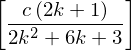

In [39]:
#To find the quantity firm A wants to produce we substitute firm B's best response function into firm A's bestreponse and then solving for q_a 
sola_subs = foc_a.subs(qb,solb) #substituting the best response into the FOC of firm A
sola_subs
solve(sola_subs,qa) #Solving for q_a

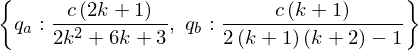

In [35]:
#Here we find the optimal quantities for both firms, where the firms take into account the best response of the other firm.

solve([foc_a, foc_b], [qa, qb])

In [37]:
Ved ikke helt hvad denne gør
#def reaction(qb,c,k):
    qa = optimize.brute(lambda x: -profit(qa,qb,c,k), ((0,1,),)) # brute minimizes the function;
                                                                 # when we minimize -profits, we maximize profits
    return x1[0]

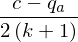

In [21]:

# Best response of q1, substituting the q2 in equation 1

sol1_subs = foc_a.subs(qb,solb)
sol1_subs

In [74]:

def conditions(q,parameters):
    u = q[0] - best_responseA(q[1],parameters[0],parameters[1])
    y = q[1] - best_responseB(q[0],parameters[0],parameters[2])
    return [u,y]

In [77]:

q = [2,2]

# Here we define the function, f, which contains a solver that solves the Nash equilibrium,
# given the parameters that are chosen in the sliders below.

def f(c,d,a,k):
    parameters = [a,c,d,k]
    solver = optimize.fsolve(conditions,q,args=(parameters))
    if solver[0] < 0:
        solver[0] = 0
    if solver[1] < 0:
        solver[1] = 0
        
    print("\n Nash Equilibrium: \n The Nash equilibrium, firm 1 produces " + str(round(solver[0],2)) + " units and firm 2 produces " + str(round(solver[1],2)) + " units.")

# Here three sliders are created:
    
widgets.interact(f,
    c = widgets.FloatSlider(description="$c_1$",min=0,max=5),
    d = widgets.FloatSlider(description="$c_2$",min=0,max=5),
    a = widgets.FloatSlider(description="$a$", min=5,max=10),
    k = widgets.FloatSlider(description="$k$", min=5,max=10),
    o = widgets.FloatSlider(description="$o$", min=5,max=10),
 )

interactive(children=(FloatSlider(value=0.0, description='$c_1$', max=5.0), FloatSlider(value=0.0, description…

<function __main__.f(c, d, a, k)>

In [76]:
foc1 = diff(profit_A(qa,qb,c,d,k),qa)
foc2 = diff(profit_B(qa,qb,d,c,k,w),qb)

AttributeError: 'Tuple' object has no attribute 'diff'

In [66]:
def conditions(q,parameters):
    u = q[0] - best_response1(q[1],parameters[0],parameters[1])
    y = q[1] - best_response2(q[0],parameters[0],parameters[2])
    return [u,y]